In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import input_data

In [4]:
mnist      = input_data.read_data_sets('data/', one_hot=True)
trainimg   = mnist.train.images
trainlabel = mnist.train.labels
testimg    = mnist.test.images
testlabel  = mnist.test.labels
print ("MNIST loaded")

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
MNIST loaded


In [40]:
print (trainimg.shape)
print (trainlabel.shape)
print (testimg.shape)
print (testlabel.shape)
#print (trainimg)
print (trainlabel[0])

(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


In [35]:
x = tf.placeholder("float", [None, 784]) 
y = tf.placeholder("float", [None, 10])  # None is for infinite 
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
# LOGISTIC REGRESSION MODEL
actv = tf.nn.softmax(tf.matmul(x, W) + b) 
# COST FUNCTION
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(actv), reduction_indices=1)) 
# OPTIMIZER
learning_rate = 0.01
optm = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [36]:
# PREDICTION
pred = tf.equal(tf.argmax(actv, 1), tf.argmax(y, 1))   
# ACCURACY
accr = tf.reduce_mean(tf.cast(pred, "float"))
# INITIALIZER
init = tf.global_variables_initializer()

In [45]:
sess = tf.InteractiveSession()

arr = np.array([[31, 23,  4, 24, 27, 34],
                [18,  3, 25,  0,  6, 35],
                [28, 14, 33, 22, 20,  8],
                [13, 30, 21, 19,  7,  9],
                [16,  1, 26, 32,  2, 29],
                [17, 12,  5, 11, 10, 15]])
#tf.rank(arr).eval()
#tf.shape(arr).eval()
#tf.argmax(arr, 0).eval()
# 0 -> 31 (arr[0, 0])
# 3 -> 30 (arr[3, 1])
# 2 -> 33 (arr[2, 2])
tf.argmax(arr, 1).eval()
# 5 -> 34 (arr[0, 5])
# 5 -> 35 (arr[1, 5])
# 2 -> 33 (arr[2, 2])

array([5, 5, 2, 1, 3, 0], dtype=int64)

In [46]:
training_epochs = 50
batch_size      = 100
display_step    = 5
# SESSION
sess = tf.Session()
sess.run(init)
# MINI-BATCH LEARNING
for epoch in range(training_epochs):
    avg_cost = 0.
    num_batch = int(mnist.train.num_examples/batch_size)
    for i in range(num_batch): 
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(optm, feed_dict={x: batch_xs, y: batch_ys})
        feeds = {x: batch_xs, y: batch_ys}
        avg_cost += sess.run(cost, feed_dict=feeds)/num_batch
    # DISPLAY
    if epoch % display_step == 0:
        feeds_train = {x: batch_xs, y: batch_ys}
        feeds_test = {x: mnist.test.images, y: mnist.test.labels}
        train_acc = sess.run(accr, feed_dict=feeds_train)
        test_acc = sess.run(accr, feed_dict=feeds_test)
        print ("Epoch: %03d/%03d cost: %.9f train_acc: %.3f test_acc: %.3f" 
               % (epoch, training_epochs, avg_cost, train_acc, test_acc))
print ("DONE")

Epoch: 000/050 cost: 1.177906594 train_acc: 0.840 test_acc: 0.855
Epoch: 005/050 cost: 0.440515266 train_acc: 0.860 test_acc: 0.895
Epoch: 010/050 cost: 0.382895913 train_acc: 0.910 test_acc: 0.905
Epoch: 015/050 cost: 0.356607343 train_acc: 0.870 test_acc: 0.909
Epoch: 020/050 cost: 0.341326642 train_acc: 0.860 test_acc: 0.912
Epoch: 025/050 cost: 0.330556413 train_acc: 0.910 test_acc: 0.913
Epoch: 030/050 cost: 0.321508561 train_acc: 0.840 test_acc: 0.916
Epoch: 035/050 cost: 0.314936944 train_acc: 0.940 test_acc: 0.917
Epoch: 040/050 cost: 0.309805418 train_acc: 0.940 test_acc: 0.918
Epoch: 045/050 cost: 0.305343132 train_acc: 0.960 test_acc: 0.918
DONE


C:\Users\Administrator\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


packs loaded
Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
4552th Training Data Label is 0


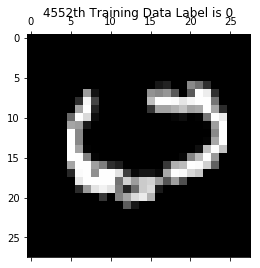

42353th Training Data Label is 9


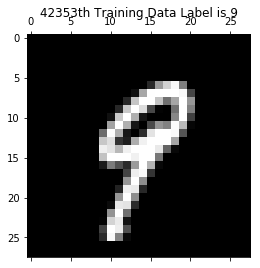

32960th Training Data Label is 7


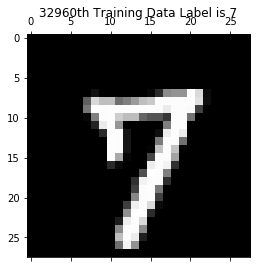

26936th Training Data Label is 3


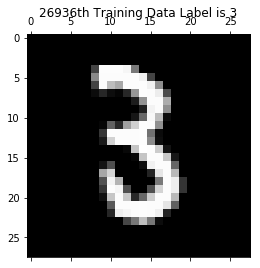

22113th Training Data Label is 2


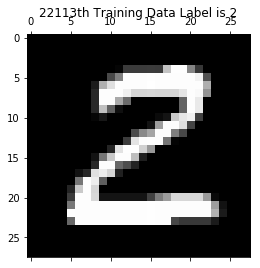

Epoch: 000/050 cost: 0.002644453 train_acc: 0.250 test_acc: 0.108
done
Epoch: 000/050 cost: 0.005281234 train_acc: 0.188 test_acc: 0.106
done
Epoch: 000/050 cost: 0.007912764 train_acc: 0.250 test_acc: 0.221
done
Epoch: 000/050 cost: 0.010538802 train_acc: 0.406 test_acc: 0.349
done
Epoch: 000/050 cost: 0.013149121 train_acc: 0.625 test_acc: 0.481
done
Epoch: 000/050 cost: 0.015727570 train_acc: 0.438 test_acc: 0.397
done
Epoch: 000/050 cost: 0.018297658 train_acc: 0.594 test_acc: 0.420
done
Epoch: 000/050 cost: 0.020867604 train_acc: 0.578 test_acc: 0.498
done
Epoch: 000/050 cost: 0.023397082 train_acc: 0.688 test_acc: 0.521
done
Epoch: 000/050 cost: 0.025961337 train_acc: 0.484 test_acc: 0.508
done
Epoch: 000/050 cost: 0.028514528 train_acc: 0.594 test_acc: 0.564
done
Epoch: 000/050 cost: 0.031061343 train_acc: 0.531 test_acc: 0.586
done
Epoch: 000/050 cost: 0.033556709 train_acc: 0.703 test_acc: 0.587
done
Epoch: 000/050 cost: 0.036086348 train_acc: 0.500 test_acc: 0.605
done
Epoch:

Epoch: 000/050 cost: 0.274527432 train_acc: 0.859 test_acc: 0.790
done
Epoch: 000/050 cost: 0.276219628 train_acc: 0.844 test_acc: 0.791
done
Epoch: 000/050 cost: 0.277713652 train_acc: 0.859 test_acc: 0.786
done
Epoch: 000/050 cost: 0.279381839 train_acc: 0.703 test_acc: 0.786
done
Epoch: 000/050 cost: 0.281078217 train_acc: 0.672 test_acc: 0.795
done
Epoch: 000/050 cost: 0.282771705 train_acc: 0.734 test_acc: 0.797
done
Epoch: 000/050 cost: 0.284438481 train_acc: 0.781 test_acc: 0.802
done
Epoch: 000/050 cost: 0.286064460 train_acc: 0.750 test_acc: 0.803
done
Epoch: 000/050 cost: 0.287605227 train_acc: 0.891 test_acc: 0.804
done
Epoch: 000/050 cost: 0.289153701 train_acc: 0.828 test_acc: 0.804
done
Epoch: 000/050 cost: 0.290731156 train_acc: 0.797 test_acc: 0.804
done
Epoch: 000/050 cost: 0.292099121 train_acc: 0.938 test_acc: 0.803
done
Epoch: 000/050 cost: 0.293712054 train_acc: 0.781 test_acc: 0.808
done
Epoch: 000/050 cost: 0.295354696 train_acc: 0.797 test_acc: 0.810
done
Epoch:

Epoch: 000/050 cost: 0.462559203 train_acc: 0.859 test_acc: 0.826
done
Epoch: 000/050 cost: 0.463824795 train_acc: 0.812 test_acc: 0.827
done
Epoch: 000/050 cost: 0.465176479 train_acc: 0.734 test_acc: 0.828
done
Epoch: 000/050 cost: 0.466324823 train_acc: 0.891 test_acc: 0.827
done
Epoch: 000/050 cost: 0.467541698 train_acc: 0.812 test_acc: 0.828
done
Epoch: 000/050 cost: 0.468641269 train_acc: 0.906 test_acc: 0.828
done
Epoch: 000/050 cost: 0.469840630 train_acc: 0.781 test_acc: 0.828
done
Epoch: 000/050 cost: 0.471099049 train_acc: 0.797 test_acc: 0.829
done
Epoch: 000/050 cost: 0.472226825 train_acc: 0.859 test_acc: 0.830
done
Epoch: 000/050 cost: 0.473457244 train_acc: 0.797 test_acc: 0.831
done
Epoch: 000/050 cost: 0.474641153 train_acc: 0.812 test_acc: 0.830
done
Epoch: 000/050 cost: 0.475891834 train_acc: 0.781 test_acc: 0.831
done
Epoch: 000/050 cost: 0.477072687 train_acc: 0.828 test_acc: 0.830
done
Epoch: 000/050 cost: 0.478373279 train_acc: 0.781 test_acc: 0.831
done
Epoch:

Epoch: 000/050 cost: 0.596771566 train_acc: 0.766 test_acc: 0.841
done
Epoch: 000/050 cost: 0.597936090 train_acc: 0.797 test_acc: 0.840
done
Epoch: 000/050 cost: 0.598864424 train_acc: 0.953 test_acc: 0.840
done
Epoch: 000/050 cost: 0.599781927 train_acc: 0.891 test_acc: 0.840
done
Epoch: 000/050 cost: 0.600754453 train_acc: 0.859 test_acc: 0.840
done
Epoch: 000/050 cost: 0.601739551 train_acc: 0.859 test_acc: 0.839
done
Epoch: 000/050 cost: 0.602707219 train_acc: 0.891 test_acc: 0.839
done
Epoch: 000/050 cost: 0.603837666 train_acc: 0.797 test_acc: 0.839
done
Epoch: 000/050 cost: 0.604790686 train_acc: 0.875 test_acc: 0.838
done
Epoch: 000/050 cost: 0.605748324 train_acc: 0.875 test_acc: 0.838
done
Epoch: 000/050 cost: 0.606790585 train_acc: 0.812 test_acc: 0.838
done
Epoch: 000/050 cost: 0.607586401 train_acc: 0.953 test_acc: 0.838
done
Epoch: 000/050 cost: 0.608646477 train_acc: 0.828 test_acc: 0.839
done
Epoch: 000/050 cost: 0.609742721 train_acc: 0.828 test_acc: 0.840
done
Epoch:

Epoch: 000/050 cost: 0.710792715 train_acc: 0.766 test_acc: 0.849
done
Epoch: 000/050 cost: 0.711863189 train_acc: 0.734 test_acc: 0.849
done
Epoch: 000/050 cost: 0.712751946 train_acc: 0.859 test_acc: 0.848
done
Epoch: 000/050 cost: 0.713637882 train_acc: 0.875 test_acc: 0.848
done
Epoch: 000/050 cost: 0.714475494 train_acc: 0.844 test_acc: 0.849
done
Epoch: 000/050 cost: 0.715369081 train_acc: 0.812 test_acc: 0.849
done
Epoch: 000/050 cost: 0.716293879 train_acc: 0.812 test_acc: 0.849
done
Epoch: 000/050 cost: 0.717078075 train_acc: 0.891 test_acc: 0.849
done
Epoch: 000/050 cost: 0.717970005 train_acc: 0.844 test_acc: 0.848
done
Epoch: 000/050 cost: 0.719118458 train_acc: 0.688 test_acc: 0.848
done
Epoch: 000/050 cost: 0.720037206 train_acc: 0.781 test_acc: 0.849
done
Epoch: 000/050 cost: 0.721072466 train_acc: 0.781 test_acc: 0.850
done
Epoch: 000/050 cost: 0.721908403 train_acc: 0.922 test_acc: 0.850
done
Epoch: 000/050 cost: 0.722784607 train_acc: 0.859 test_acc: 0.850
done
Epoch:

Epoch: 000/050 cost: 0.813895124 train_acc: 0.875 test_acc: 0.860
done
Epoch: 000/050 cost: 0.814766490 train_acc: 0.812 test_acc: 0.860
done
Epoch: 000/050 cost: 0.815557317 train_acc: 0.906 test_acc: 0.860
done
Epoch: 000/050 cost: 0.816469639 train_acc: 0.828 test_acc: 0.859
done
Epoch: 000/050 cost: 0.817326448 train_acc: 0.797 test_acc: 0.859
done
Epoch: 000/050 cost: 0.818226461 train_acc: 0.828 test_acc: 0.859
done
Epoch: 000/050 cost: 0.819016358 train_acc: 0.844 test_acc: 0.859
done
Epoch: 000/050 cost: 0.819732089 train_acc: 0.906 test_acc: 0.859
done
Epoch: 000/050 cost: 0.820561733 train_acc: 0.875 test_acc: 0.860
done
Epoch: 000/050 cost: 0.821506351 train_acc: 0.828 test_acc: 0.860
done
Epoch: 000/050 cost: 0.822282865 train_acc: 0.891 test_acc: 0.860
done
Epoch: 000/050 cost: 0.823105093 train_acc: 0.844 test_acc: 0.860
done
Epoch: 000/050 cost: 0.823778539 train_acc: 0.922 test_acc: 0.860
done
Epoch: 000/050 cost: 0.824652951 train_acc: 0.797 test_acc: 0.860
done
Epoch:

Epoch: 000/050 cost: 0.910149094 train_acc: 0.859 test_acc: 0.866
done
Epoch: 000/050 cost: 0.910830765 train_acc: 0.875 test_acc: 0.865
done
Epoch: 000/050 cost: 0.911759216 train_acc: 0.766 test_acc: 0.865
done
Epoch: 000/050 cost: 0.912480509 train_acc: 0.906 test_acc: 0.865
done
Epoch: 000/050 cost: 0.913122415 train_acc: 0.938 test_acc: 0.865
done
Epoch: 000/050 cost: 0.913847988 train_acc: 0.891 test_acc: 0.864
done
Epoch: 000/050 cost: 0.914756367 train_acc: 0.781 test_acc: 0.865
done
Epoch: 000/050 cost: 0.915620681 train_acc: 0.828 test_acc: 0.865
done
Epoch: 000/050 cost: 0.916503910 train_acc: 0.812 test_acc: 0.865
done
Epoch: 000/050 cost: 0.917470634 train_acc: 0.797 test_acc: 0.866
done
Epoch: 000/050 cost: 0.918201023 train_acc: 0.844 test_acc: 0.865
done
Epoch: 000/050 cost: 0.918881823 train_acc: 0.859 test_acc: 0.864
done
Epoch: 000/050 cost: 0.919674077 train_acc: 0.781 test_acc: 0.865
done
Epoch: 000/050 cost: 0.920508303 train_acc: 0.828 test_acc: 0.865
done
Epoch:

Epoch: 000/050 cost: 1.000522773 train_acc: 0.719 test_acc: 0.868
done
Epoch: 000/050 cost: 1.001086425 train_acc: 0.906 test_acc: 0.868
done
Epoch: 000/050 cost: 1.001812412 train_acc: 0.891 test_acc: 0.868
done
Epoch: 000/050 cost: 1.002507631 train_acc: 0.891 test_acc: 0.868
done
Epoch: 000/050 cost: 1.003271562 train_acc: 0.859 test_acc: 0.867
done
Epoch: 000/050 cost: 1.003975628 train_acc: 0.875 test_acc: 0.867
done


KeyboardInterrupt: 

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import input_data
print('packs loaded')

'''
图像数字识别

'''

mnist = input_data.read_data_sets('data/', one_hot=True)
# print(type(mnist))
# print(mnist.train.num_examples)
# print(mnist.test.num_examples)

trainimg = mnist.train.images
trainlabel = mnist.train.labels
testimg = mnist.test.images
testlabel = mnist.test.labels
nsample = 5
randidx = np.random.randint(trainimg.shape[0], size=nsample)
for i in randidx:
    curr_img = np.reshape(trainimg[i, :], (28, 28))  # 28 by 28 matrix
    curr_label = np.argmax(trainlabel[i, :])  # Label
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.title("" + str(i) + "th Training Data "
              + "Label is " + str(curr_label))
    print("" + str(i) + "th Training Data "
          + "Label is " + str(curr_label))
    plt.show()

x = tf.placeholder('float', [None, 784])
y = tf.placeholder('float', [None, 10])

W = tf.Variable(tf.ones([784, 10]))
b = tf.Variable(tf.zeros([10]))
# 样本十分类softmax预测值的结果 (概率值)
actv = tf.nn.softmax(tf.matmul(x, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(actv), reduction_indices=1))

learning_rate = 0.01

optm = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
# 返回准确率的true和false值
pred = tf.equal(tf.argmax(actv, 1), tf.argmax(y, 1))
# cast是把true和转化成float(0,1)以便于准确率的衡量
accr = tf.reduce_mean(tf.cast(pred, 'float32'))

init = tf.global_variables_initializer()

sess = tf.InteractiveSession()

arr = np.array([[31, 23, 4, 24, 27, 34],
                [18, 3, 25, 0, 6, 35],
                [28, 14, 33, 22, 20, 8],
                [13, 30, 21, 19, 7, 9],
                [16, 1, 26, 32, 2, 29],
                [17, 12, 5, 11, 10, 15]])
# 所有的样本迭代10次
training_epochs = 10
# 每进行一次迭代选取100个样本
batch_size = 128
# 每五次打印一次
display_step = 20
# TensorFlow初始化
sess = tf.Session()
sess.run(init)

for epoch in range(training_epochs):
    avg_cost = 0
    #
    num_batch = int(mnist.train.num_examples / batch_size)
    for i in range(num_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # run梯度下降,字典里是placeholder
        sess.run(optm, feed_dict={x: batch_xs, y: batch_ys})
        feeds = {x: batch_xs, y: batch_ys}
        # 损失值不断增加
        avg_cost += sess.run(cost, feed_dict=feeds) / num_batch

        if epoch % display_step == 0:
            feeds_train = {x: batch_xs, y: batch_ys}
            feeds_test = {x: mnist.test.images, y: mnist.test.labels}
            train_acc = sess.run(accr, feed_dict=feeds_train)
            test_acc = sess.run(accr, feed_dict=feeds_test)
            print("Epoch: %03d/%03d cost: %.9f train_acc: %.3f test_acc: %.3f"
                  % (epoch, training_epochs, avg_cost, train_acc, test_acc))
            print('done')